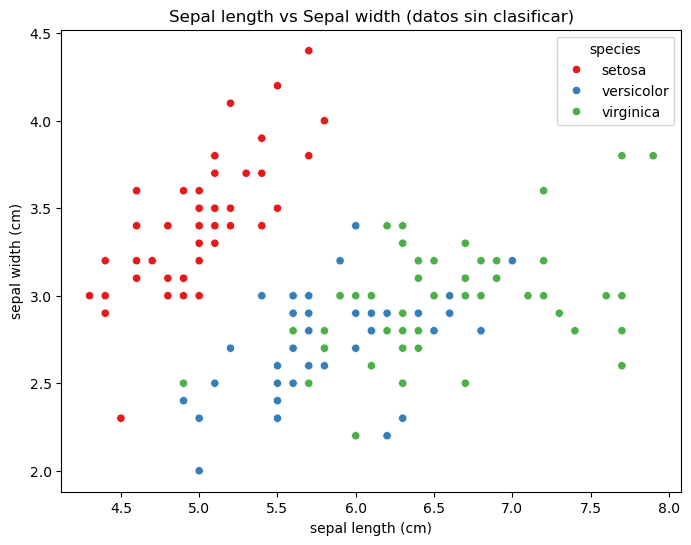

In [6]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Cargamos el dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].map({0:"setosa", 1:"versicolor", 2:"virginica"})

# Scatterplot con dos características (diagrama de dispersión).
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species",
    palette="Set1",
    data=df
)
plt.title("Sepal length vs Sepal width (datos sin clasificar)")
plt.show()

In [7]:
# Importamos de la biblioteca el dataset, el modelo y las métricas.
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargamos el dataset y preparamos los datos y etiquetas.
iris = load_iris()
x = iris.data
y = iris.target

# Mostramos la cantidad de muestras y las categorías que incluye el dataset.
print("Shape X:", x.shape, "Shape y:", y.shape, "\n")
print("Variables:", iris.feature_names, "\n")

# Dividimos la información para entrenar el modelo.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

# Creamos y entrenamos al modelo.
lsvc = LinearSVC(C=1.0, max_iter=10000, random_state=42)
lsvc.fit(x_train, y_train)

# Probamos el modelo (clasificación de flores).
y_pred = lsvc.predict(x_test)

# Aplicamos las métricas para medir el rendimiento del modelo.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

# Imprimimos los resultados de las métricas.
print(f"Accuracy:  {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall:    {recall: .4f}")
print(f"F1:        {f1: .4f}")

Shape X: (150, 4) Shape y: (150,) 

Variables: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1:         1.0000


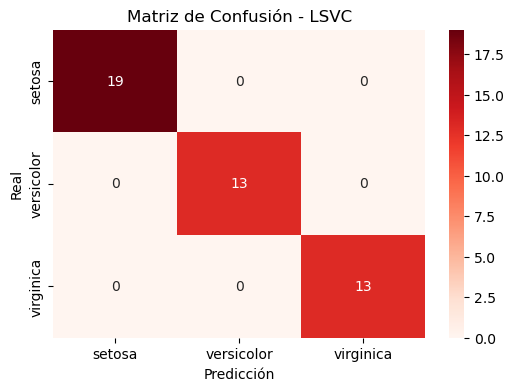

In [8]:
# Importamos las bibliotecas para crear la matriz de confución.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusión - LSVC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

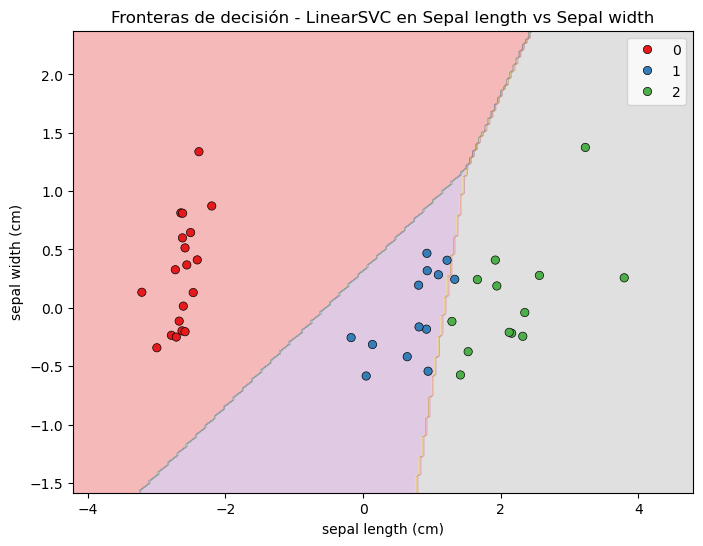

In [9]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Reducimos a 2D con PCA.
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Entrenamos nuevamente pero ahora con los datos reducidos a 2D.
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_pca, y, test_size=0.3, random_state=42
)

lsvc_pca = LinearSVC(C=1.0, max_iter=10000, random_state=42)
lsvc_pca.fit(x_train_pca, y_train_pca)

y_pred_pca = lsvc_pca.predict(x_test_pca)

# Graficamos la frontera de decisión.
# Creamos una malla de puntos.
xx, yy = np.meshgrid(
    np.linspace(x_test_pca[:,0].min()-1, x_test_pca[:,0].max()+1, 200),
    np.linspace(x_test_pca[:,1].min()-1, x_test_pca[:,1].max()+1, 200)
)

Z = lsvc_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")
sns.scatterplot(
    x=x_test_pca[:,0],
    y=x_test_pca[:,1],
    hue=y_test_pca,
    palette="Set1",
    edgecolor="k"
)
plt.title("Fronteras de decisión - LinearSVC en Sepal length vs Sepal width")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()
